<a href="https://colab.research.google.com/github/RaqeebShaikh12/Capstone-Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a deep learning image segmentation model to correctly identify 4 types of defects on the images. Identifying different types of steel sheet defects is critical to improving the company's and industry's automation, increasing efficiency, and maintaining high quality in production.

### Importing all the important libraries

In [9]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 6666 images of steel sheet defect types. The dataset contains 4679 images in train, 1308 images in validation, and 679 images in test subdirectories. In each subdirectory they contains their respective CSV files.

In [3]:
# Defining the path for train, validate, and test images

data_dir_train = pathlib.Path("/content/gdrive/MyDrive/severstal-steel-defect-detection.v1i.multiclass/train")
data_dir_validate = pathlib.Path("/content/gdrive/MyDrive/severstal-steel-defect-detection.v1i.multiclass/valid")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/severstal-steel-defect-detection.v1i.multiclass/test")

In [4]:
# paths to your CSV files
csv_file_train = "/content/gdrive/MyDrive/severstal-steel-defect-detection.v1i.multiclass/train_classes.csv"
csv_file_validate = "/content/gdrive/MyDrive/severstal-steel-defect-detection.v1i.multiclass/valid_classes.csv"
csv_file_test = "/content/gdrive/MyDrive/severstal-steel-defect-detection.v1i.multiclass/test_classes.csv"

# Read CSV files
df_train = pd.read_csv(csv_file_train)
df_validate = pd.read_csv(csv_file_validate)
df_test = pd.read_csv(csv_file_test)

# Count images in training CSV
image_count_train = len(df_train)
print("Number of images in training CSV:", image_count_train)

# Count images in validation CSV
image_count_validate = len(df_validate)
print("Number of images in validation CSV:", image_count_validate)

# Count images in test CSV
image_count_test = len(df_test)
print("Number of images in test CSV:", image_count_test)


Number of images in training CSV: 4679
Number of images in validation CSV: 1308
Number of images in test CSV: 679


In [5]:
# Print the shape of each CSV file
print("Shape of Training CSV:", df_train.shape)
print("Shape of Validation CSV:", df_validate.shape)
print("Shape of Test CSV:", df_test.shape)

Shape of Training CSV: (4679, 5)
Shape of Validation CSV: (1308, 5)
Shape of Test CSV: (679, 5)


In [6]:
# Display top 5 rows of train CSV file
print("\nTop 5 rows of Training CSV:")
df_train.head()


Top 5 rows of Training CSV:


,filename,class-1,class-2,class-3,class-4
0,82b23f53c_jpg.rf.07f70fcc3e9b12b98d966a6b852d3...,0,0,1,0
1,844a48ae2_jpg.rf.07fe44a03121491ea042c77086120...,0,0,1,0
2,4cf3b3988_jpg.rf.0832e7076083ce7bebc7d115f9448...,1,0,0,0
3,a3a66a86a_jpg.rf.0852a027e146a1e1061fb497a528f...,0,0,1,0
4,30ed4ed02_jpg.rf.0861469ede3819d8fb5a80fc3003a...,0,0,0,1


In [7]:
print("\nTop 5 rows of Validation CSV:")
df_validate.head()


Top 5 rows of Validation CSV:


,filename,class-1,class-2,class-3,class-4
0,238d6df92_jpg.rf.00921470c2d3e475037e64212585b...,0,0,1,0
1,fce971b43_jpg.rf.013f3fb6891623a7ccbc776793bda...,0,0,1,0
2,9ba68fdaa_jpg.rf.01613c2c4724517732466fbf97c03...,0,0,1,0
3,9753787e9_jpg.rf.01437b831d0a15ecc7bffebeab2b4...,0,0,1,1
4,6860ae804_jpg.rf.0190318e72cea5be5a234376d5936...,0,0,1,0


In [8]:
print("\nTop 5 rows of Test CSV:")
df_test.head()


Top 5 rows of Test CSV:


,filename,class-1,class-2,class-3,class-4
0,252c10c1a_jpg.rf.00a0c09b26d84c2cf4e7efc431b78...,0,0,1,0
1,fbcb3df55_jpg.rf.00c39ac1f09905ddd042ee7cdb8ec...,0,0,1,0
2,c74abe00a_jpg.rf.00c47247b98dda59db402dc2e990f...,0,0,1,0
3,bba274c50_jpg.rf.014a29b62511869be8b7ce532ff78...,0,0,1,0
4,1d5f3ecb8_jpg.rf.016eb39f80b8b2f0096af6a0d4ab8...,0,0,1,0


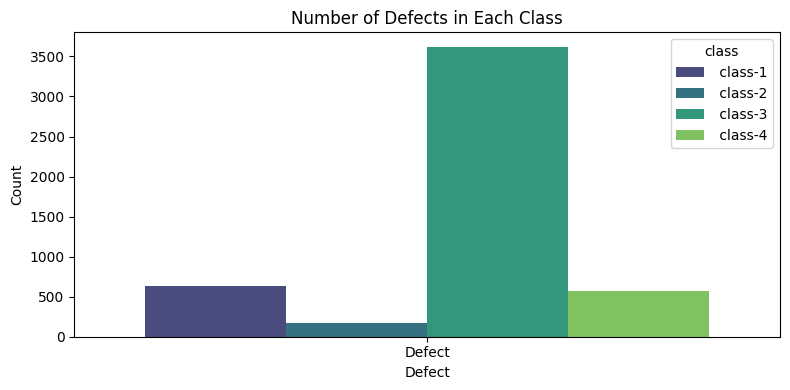

In [25]:
# Melt the DataFrame to convert the class columns into rows
melted_df = df_train.melt(id_vars=['filename'], var_name='class', value_name='defect')
melted_df['defect'] = melted_df['defect'].map({0: 'No Defect', 1: 'Defect'})

# Filter only rows where defect is 'Defect'
defect_df = melted_df[melted_df['defect'] == 'Defect']

# Create the countplot
plt.figure(figsize=(8, 4))
sns.countplot(x='defect', data=defect_df, hue='class', palette='viridis')
plt.title('Number of Defects in Each Class')
plt.xlabel('Defect')
plt.ylabel('Count')
plt.tight_layout()
plt.show()